In [1]:
# Load the MNIST data, and split it into a training set, a validation set, and a test set.
# Using 50,000 instances for training, 10,000 for validation, and 10,000 for testing.

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

### Random Forest classifier, an Extra-Trees classifier, SVM, and MLPClassifier.

In [2]:
# Training various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, SVM, and MLPClassifier.

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [3]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]

for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                 

c:\users\tahaa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training the MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [4]:
[estimator.score(X_val, y_val) for estimator in estimators]

# Validation score for RandomForestClassifier = 0.9692. 2nd
# Validation score for ExtraTreesClassifier = 0.9715. 1st
# Validation score for LinearSVC = 0.8626. 4th
# Validation score for MLPClassifier = 0.9655. 3rd

[0.9692, 0.9715, 0.8626, 0.9655]

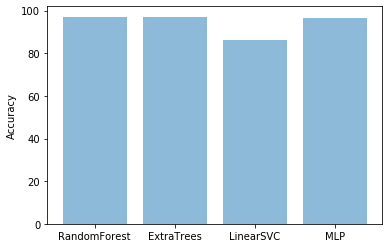

In [5]:
import numpy as np
import matplotlib.pyplot as plt

models = ('RandomForest', 'ExtraTrees', 'LinearSVC', 'MLP')
y_pos = np.arange(len(models))
accuracy = [96.92, 97.15, 86.26, 96.55]

plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()

### VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, LinearSVC, & MLPClassifier. 
### Hard voting.

In [6]:
# Combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier( estimators=[('RandomForestClassifier', random_forest_clf), 
                                           ('ExtraTreesClassifier', extra_trees_clf), 
                                           ('LinearSVC', svm_clf), 
                                           ('MLPClassifier', mlp_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

c:\users\tahaa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fractio

In [7]:
voting_clf.score(X_val, y_val)

# VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, LinearSVC, MLPClassifier. 
# Hard voting validation score = 0.9706

0.9706

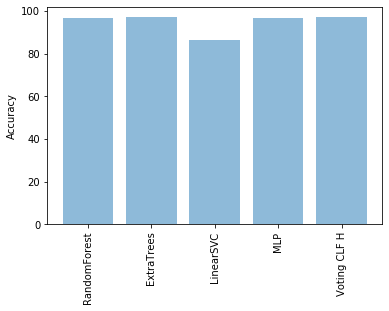

In [8]:
import numpy as np
import matplotlib.pyplot as plt

models = ('RandomForest', 'ExtraTrees', 'LinearSVC', 'MLP', 'Voting CLF H')
y_pos = np.arange(len(models))
accuracy = [96.92, 97.15, 86.26, 96.55, 97.06]

plt.xticks(y_pos, models, rotation=90)
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()

### VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, & MLPClassifier. 
### Hard voting.

In [9]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs

In [10]:
# Remove SVM from the list of trained classifiers as it performed the worst.


del voting_clf.estimators_[2]

In [11]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs

In [12]:
voting_clf.score(X_val, y_val)

# VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, & MLPClassifier. 
# Hard voting validation score = 0.9738

0.9738

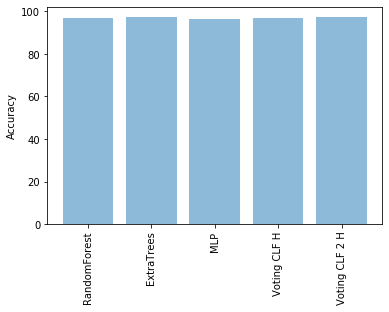

In [13]:
models = ('RandomForest', 'ExtraTrees', 'MLP', 'Voting CLF H', 'Voting CLF 2 H')
y_pos = np.arange(len(models))
accuracy = [96.92, 97.15, 96.55, 97.06, 97.38]

plt.xticks(y_pos, models, rotation=90)
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()

### VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, & MLPClassifier. 
### Soft voting.

In [14]:
voting_clf.voting = "soft"

In [15]:
voting_clf.score(X_val, y_val)

# VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier & MLPClassifier. 
# Soft voting validation score = 0.9713
# VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, & MLPClassifier. Hard voting outperforms all the
# other classifiers on the validation set.

# Soft voting's score (0.9713) is lower than hard voting (0.9738) so we will go back to hard voting.

0.9713

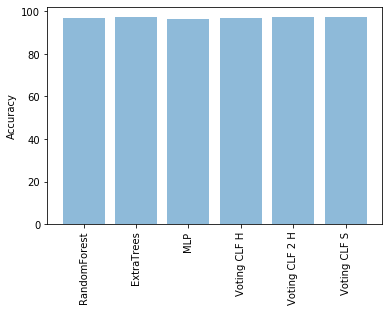

In [16]:
models = ('RandomForest', 'ExtraTrees', 'MLP', 'Voting CLF H', 'Voting CLF 2 H', 'Voting CLF S')
y_pos = np.arange(len(models))
accuracy = [96.92, 97.15, 96.55, 97.06, 97.38, 97.13]

plt.xticks(y_pos, models, rotation=90)
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()

### Back to VotingClassifer Ensemble w/ RandomForestClassifier, ExtraTreesClassifier, & MLPClassifier. 
### Hard voting.

In [17]:
voting_clf.voting = "hard"

In [18]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs

In [19]:
voting_clf.score(X_val, y_val)

0.9738

In [20]:
voting_clf.score(X_test, y_test)

0.9706

In [21]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9645, 0.9691, 0.9624]

## XGBoost

### XGBClassifier

In [22]:
import xgboost
from xgboost import XGBRFClassifier

xgb_rfc = XGBRFClassifier()

xgb_rfc.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = xgb_rfc.predict(X_val)

[0]	validation_0-merror:0.10910


In [23]:
xgb_rfc.score(X_val, y_val)

# Validation score for XGBClassifier = 0.8909

0.8909

In [24]:
xgb_rfc.score(X_test, y_test)

# Accuracy score for XGBClassifier = 0.8924

0.8924

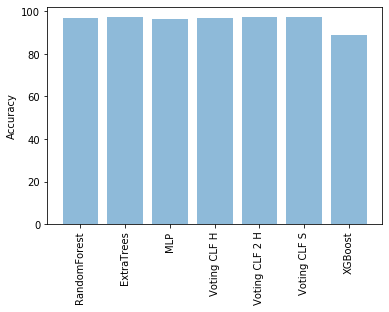

In [25]:
models = ('RandomForest', 'ExtraTrees', 'MLP', 'Voting CLF H', 'Voting CLF 2 H', 'Voting CLF S', 'XGBoost')
y_pos = np.arange(len(models))
accuracy = [96.92, 97.15, 96.55, 97.06, 97.38, 97.13, 89.09]

plt.xticks(y_pos, models, rotation=90)
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()

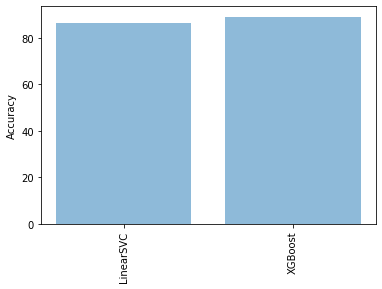

In [26]:
models = ('LinearSVC', 'XGBoost')
y_pos = np.arange(len(models))
accuracy = [86.26, 89.09]

plt.xticks(y_pos, models, rotation=90)
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')

plt.show()